#### Part-a

Formula for sum of a geometric series follows as follows:
\begin{equation}
    \sum_{n=0}^{N-1} c\alpha^n = c\frac{\alpha^{N}-1}{\alpha-1}
\end{equation}
Similarly we are asked to calculate:
\begin{equation}
    \sum_{x=0}^{N-1} exp(-2\pi \iota kx/N) = ?
\end{equation}
So for,
\begin{equation}
    \alpha = exp(-2\pi \iota k/N)
\end{equation}
\begin{equation}
    \sum_{x=0}^{N-1} exp(-2\pi \iota kx/N) = \sum_{x=0}^{N-1} exp(-2\pi \iota k/N)^x =  \sum_{x=0}^{N-1} c\alpha^x = c\frac{\alpha^{N}-1}{\alpha-1}    
\end{equation}
Therefore, (with c = 1)
\begin{equation}
     \sum_{x=0}^{N-1} exp(-2\pi \iota k/N)^{x} = \frac{exp(-2\pi \iota k/N)^{N}-1}{exp(-2\pi \iota k/N)-1}
\end{equation}
or,
\begin{align}
     \sum_{x=0}^{N-1} exp(-2\pi \iota k/N)^{x} &= \frac{1-exp(-2\pi \iota k/N)^{N}}{1-exp(-2\pi \iota k/N)} \\
                                               &= \frac{1-exp(-2\pi \iota k)}{1-exp(-2\pi \iota k/N)}  
\end{align}

### Part-b

To show the value of the series sum in the limit k->0, we can simply apply L'Hospital rule as follow:
\begin{align*}
    \lim_{k \to 0} \sum_{x=0}^{N-1} exp(-2\pi \iota xk/N) &= \frac{\frac{d}{dk}(1-exp(-2\pi \iota k/N)^{N})}{\frac{d}{dk}(1-exp(-2\pi \iota k/N))} \\
    &= \frac{-(-2\pi \iota)exp(-2\pi \iota k)}{-(-2\pi \iota)exp(-2\pi \iota k/N)} \\
    &= \frac{-(-2\pi \iota)}{-(-2\pi \iota /N)} \\
    &= N
\end{align*}

Here in the third step we took $exp(-2\pi \iota k)=1$ which happens for k = 0,N due to the periodicity of N. For any other value of k we need not take any limit.
For integer values of k (other than 0,N): $exp(-2\pi \iota k) = 1$ which makes the numerator go to zero, while the denominator term doesnt due to 1/N in the exponent. 

Thus, for integral values of k (other than 0,N,2N,...)

\begin{align*}
    \sum_{x=0}^{N-1} exp(-2\pi \iota xk/N) &= \frac{\frac{d}{dk}(1-exp(-2\pi \iota k/N)^{N})}{\frac{d}{dk}(1-exp(-2\pi \iota k/N))} \\
    &= \frac{1-1}{1-exp(-2\pi \iota k/N)} \\
    &= 0
\end{align*}


### Part-c

Working up the DFT of our non-integer sine wave:

\begin{equation}
sin(x) = \frac{exp(\iota x)-exp(-\iota x)}{2\iota}
\end{equation}
Hence DFT of sin(2\pi k' x/N) is:
\begin{equation}
DFT[sin(x)] = \sum_{x=0}^{N-1} \frac{exp(2\pi k'\iota x)-exp(-2\pi k'\iota x)}{2\iota} exp(-2\pi \iota kx/N)
\end{equation}
This can be further simplified to:
\begin{align}
DFT[sin(x)] &= (1/2\iota)\sum_{x=0}^{N-1} (exp(-2\pi \iota (k-k')x/N)-exp(-2\pi \iota (k+k')x/N))\\
            &= (1/2\iota)(\frac{1-exp(-2\pi \iota (k-k'))}{1-exp(-2\pi \iota (k-k')/N)}-\frac{1-exp(-2\pi \iota (k+k'))}{1-exp(-2\pi \iota (k+k')/N)})
\end{align}




In [34]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

Defining function to return the analytic value: 

In [35]:
def sine_dft_analytic(x,l):
	N = len(x)+0. 
	k = np.fft.fftfreq(len(x),x[1]-x[0])*N # Reconfiguring the range of k to [-N/2,N/2-1]
	t1 = (1.-np.exp(-2.*np.pi*1J*(k-l)))/(1.-np.exp(-2.*np.pi*1J*(k-l)/N)) # term shifted by +l (corresponding to first exp term in sin)
	t2 = (1.-np.exp(-2.*np.pi*1J*(k+l)))/(1.-np.exp(-2.*np.pi*1J*(k+l)/N)) # term shifted by -l (corresponding to 2nd exp term in sin)
	dft_sine = (t1-t2)/(2J)
	return dft_sine

Also, defining function that returns **L** periods of sine in range of x

In [36]:
def non_int_sine(x,l): # Return sine wave with 'l' periods in range of x
	return np.sin(2.*np.pi*l*x/(len(x)))

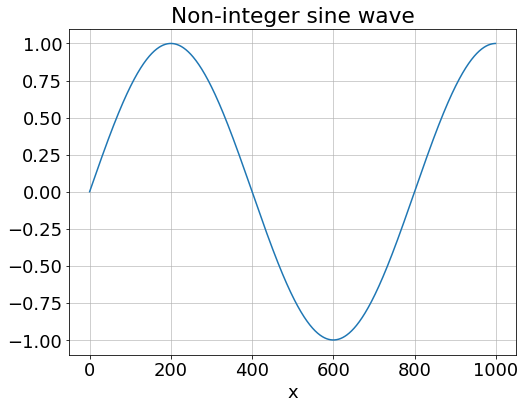

In [37]:
# Defining the input
l = 1.250 # Number of periods
x = np.linspace(0.0,999.0,1000) # Sampling thousand points 

y = non_int_sine(x,l) #

plt.figure(figsize=(8,6))      
plt.title('Non-integer sine wave')
plt.xlabel('x')
plt.grid(alpha=0.75)
plt.plot(y)
plt.show()
plt.close()

Using this now I calculate the dft by two methods, one the analytic function we calculated earlier, second by directly taking the fft

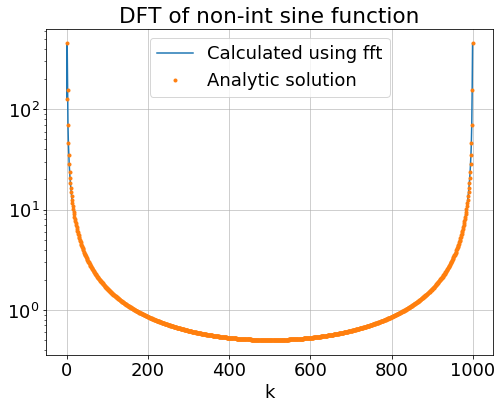

Variance in dft results:  3.3768843949692646e-14


In [38]:
dft_sine_ana = sine_dft_analytic(x,l) # Analytic answer
dft_sine_fft = np.fft.fft(y)		  # Using fft

plt.figure(figsize=(8,6))      
plt.title('DFT of non-int sine function')
plt.yscale('log')
plt.xlabel('k')
plt.grid(alpha=0.75)
plt.plot(np.abs(dft_sine_fft),label='Calculated using fft')
plt.plot(np.abs(dft_sine_ana),'.',label='Analytic solution')
plt.legend()
plt.show()
plt.close()

print('Variance in dft results: ', np.std(np.abs(dft_sine_ana)-np.abs(dft_sine_fft)))

***
The non-integer number of periods in input causes a jump when going from the end or array to beginning which shows up as leakage at points other than the actual signal freqency.

As you can see, both results closely match as is expected. We have almost reached machine precision with this. 
***
(Results are slightly worse than expected due to rounding off error, this can be proved by increasing the number of sampling point as this will cause the precision to drop further) At about 100 sampled points precision reaches 10^-15

### Part-d

Defining the window function:

In [39]:
def window(y):
	x = np.linspace(0,1,len(y))
	y1 = 0.5*(1.-np.cos(2.*np.pi*x)) # Hanning wind
	y_new = y1*y 
	return y_new # Returns product of input with the window

Re-evaluating the DFT using the windowed data

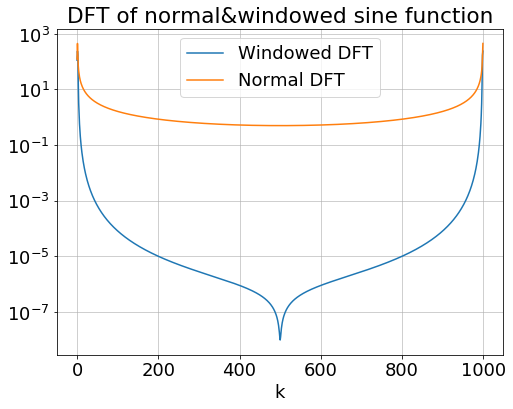

In [40]:
y_window = window(y)
dft_sine_window = np.fft.fft(y_window)

plt.figure(figsize=(8,6))      
plt.title('DFT of normal&windowed sine function')
plt.xlabel('k')
plt.grid(alpha=0.75)
#plt.ylabel('f(x)')
plt.yscale('log')
plt.plot(np.absolute(dft_sine_window[:]),label='Windowed DFT')
plt.plot(np.absolute(dft_sine_fft[:]),label='Normal DFT')
plt.legend()
plt.show()
plt.close()

The window significantly suppresses the leakage by forcing the input function to go to zero at the ends. The supression can be clearly seen above where we get almost 4 orders of magnitude improvement in a large chuck of the entire range.

### Part-e

We can use the same approach as before from 'c'. 
\begin{equation}
f(x) = 0.5*(1-cos(2\pi x/N))
\end{equation}

Thus,
\begin{align}
DFT[f(x)] &= \sum_{x=0}^{N-1} (0.5-(\frac{exp(2\pi k'\iota x)+exp(-2\pi k'\iota x)}{4}) exp(-2\pi \iota kx/N)\\
            &= (1/4)(\sum_{x=0}^{N-1} (2exp(-2\pi \iota kx/N) - exp(-2\pi \iota (k-k')x/N)-exp(-2\pi \iota (k+k')x/N))\\
            &= (1/4)(2N\delta_{k=0}-N\delta_{k=k'}-N\delta_{k+k'=0,N})
\end{align}

Which gives us: DFT[window] = [N/2,-N/4,0,.....0,-N/4]

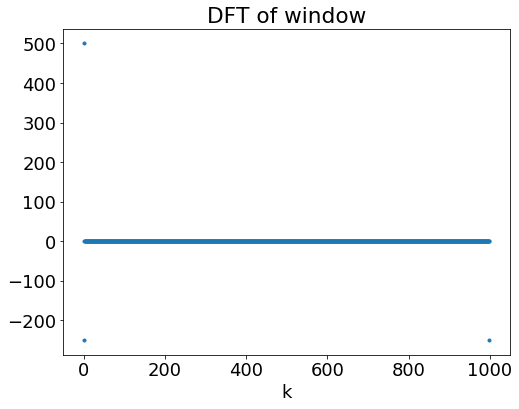

In [41]:
N = len(x)

dft_window = np.fft.fft(0.5*(1-np.cos(2.*np.pi*x/len(x)))) # Taking DFT pf window function

plt.figure(figsize=(8,6))      
plt.title('DFT of window')
plt.xlabel('k')
plt.plot((dft_window),'.')
plt.show()
plt.close()

This matches the analytic answer as here N=1000

We can recreate the windowed DFT by simply knowing the above fourier transform of the window. In this case we basically have 3 delta function which when convolved with the DFT of unwindowed one gives us copies shifted to indecies [0,1,N-1].

Another way of interpreting, we can recreate the windowed FT by taking each point in the unwindowed one, and subtracting the average of its immediate neighbouring points. i.e. 
$$F_{windowed}[k] = 0.5(F[k]-\frac{F[k-1]+F[k+1]}{2})$$

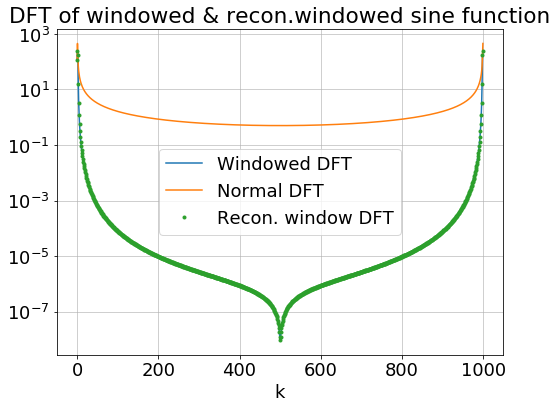

In [43]:
dft_sine_recon = ((dft_window[0])*np.roll(dft_sine_fft,0)+(dft_window[1])*np.roll(dft_sine_fft,1)+(dft_window[-1])*np.roll(dft_sine_fft,N-1))/N

plt.figure(figsize=(8,6))      
plt.title('DFT of windowed & recon.windowed sine function')
plt.xlabel('k')
plt.grid(alpha=0.75)
plt.yscale('log')
plt.plot(np.absolute(dft_sine_window[:]),label='Windowed DFT')
plt.plot(np.absolute(dft_sine_fft),label='Normal DFT')
plt.plot(np.absolute(dft_sine_recon[:]),'.',label='Recon. window DFT')
plt.legend()
plt.show()
plt.close()